In [1]:
import os
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from scipy.stats import shapiro

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import statsmodels
import statsmodels.api as sm

In [4]:
df = pd.read_csv('Student Perform.csv', usecols= ['GPA', 'AttendanceRate', 'StudyHours'])
df.head()

,GPA,AttendanceRate,StudyHours
0,2.743879,0.906809,1.089243
1,2.587700,0.843739,0.879911
2,2.426294,0.850923,1.003442
3,3.558240,0.946786,1.814810
4,3.896884,0.988036,1.157241


In [5]:
df.info

<bound method DataFrame.info of               GPA  AttendanceRate  StudyHours
0        2.743879        0.906809    1.089243
1        2.587700        0.843739    0.879911
2        2.426294        0.850923    1.003442
3        3.558240        0.946786    1.814810
4        3.896884        0.988036    1.157241
...           ...             ...         ...
8000769  2.658155        0.838433    0.857053
8000770  2.709118        0.913716    1.100437
8000771  2.694017        0.781214    0.934239
8000772  3.477801        0.934283    0.682589
8000773  3.294708        0.927493    1.276369

[8000774 rows x 3 columns]>

In [6]:
df.describe()

,GPA,AttendanceRate,StudyHours
count,8.000774e+06,8.000774e+06,8.000774e+06
mean,2.996743e+00,8.995891e-01,9.997262e-01
std,4.595127e-01,4.806154e-02,3.481091e-01
min,7.131814e-01,7.000000e-01,0.000000e+00
25%,2.685036e+00,8.669519e-01,7.642085e-01
50%,2.999824e+00,8.999776e-01,9.998944e-01
75%,3.314440e+00,9.330400e-01,1.235127e+00
max,4.000000e+00,1.000000e+00,2.793829e+00


In [7]:
df.isna().sum()

GPA               0
AttendanceRate    0
StudyHours        0
dtype: int64

In [8]:
duplicate = df[df.duplicated]
duplicate

,GPA,AttendanceRate,StudyHours


In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.shape

(8000774, 3)

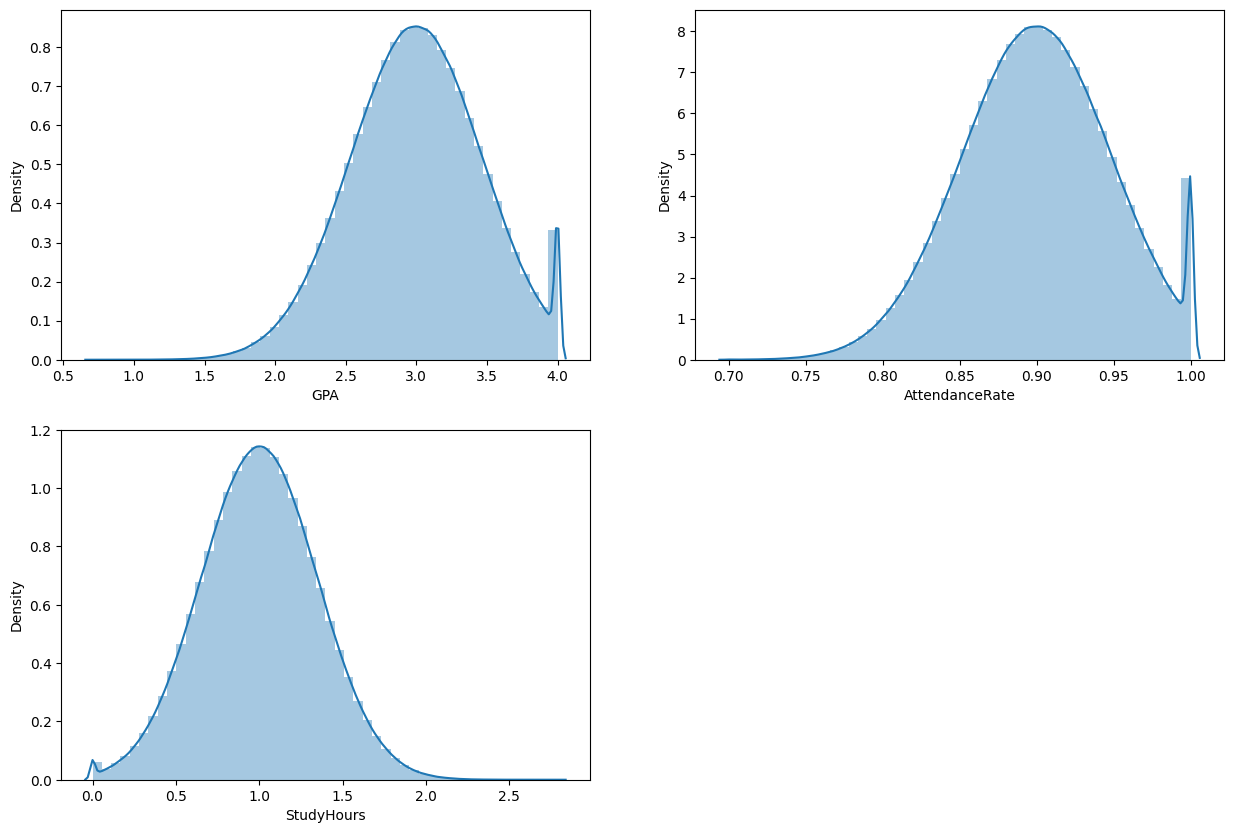

In [11]:
# Cek normalitas data dengan histogram
warnings.filterwarnings('ignore')
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.distplot(df["GPA"], ax=axes[0, 0])
sns.distplot(df["AttendanceRate"], ax=axes[0, 1])
sns.distplot(df["StudyHours"], ax=axes[1, 0])

fig.delaxes(axes[1, 1])
plt.show()

Terlihat pada diagram (distribusi plot) bahwa semua distribusi mendekati normal dengan detail : 
GPA dengan puncak nilai ada di 3.0 - 3.5, memiliki lonjakan di 4.0 (kemungkinan ada cukup banyak mahasiswa dengan nilai sempurna);
AttendanceRate dengan puncak kehadiran di 0.85 - 1.0, artinya banyak mahasiswa yang hadir;
StudyHours dengan puncak yang berada di 1.0, memiliki right-skewed (adanya mahasiswa yang memiliki jam belajar lebih dari rata rata)

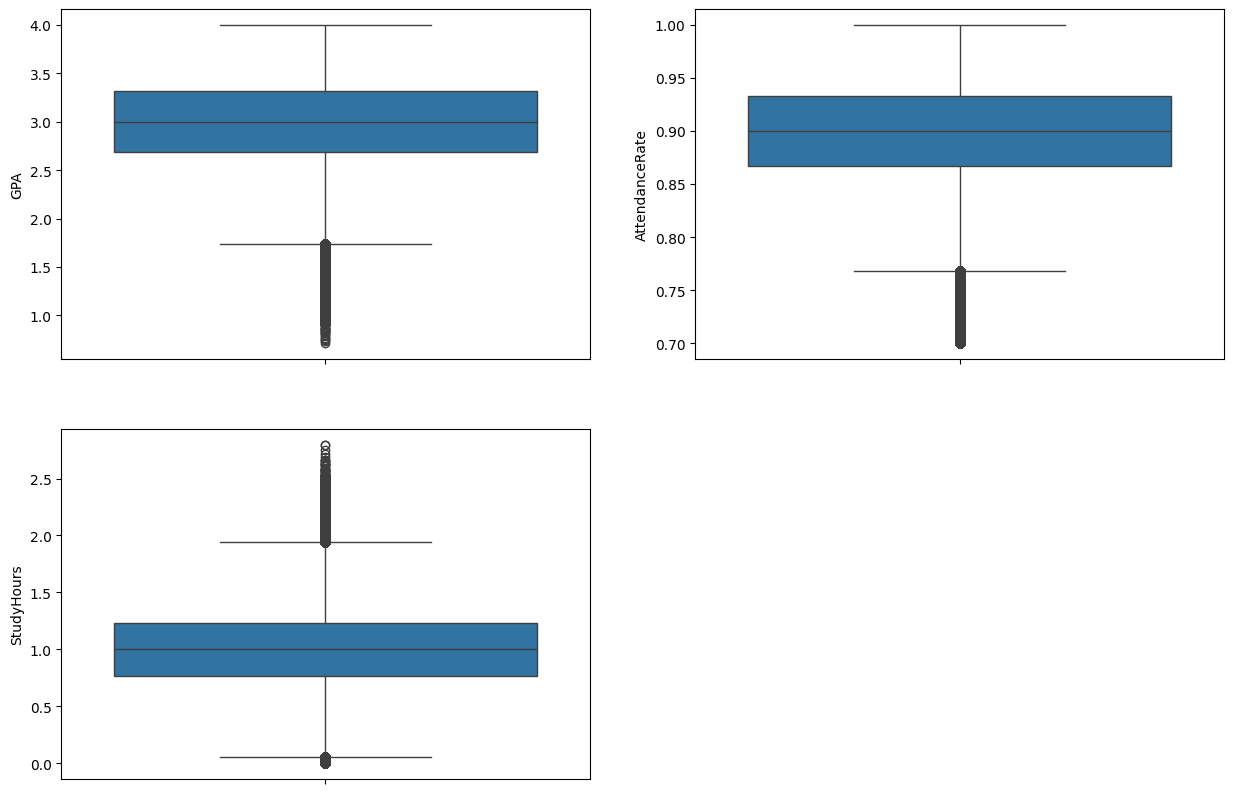

In [12]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.boxplot(df["GPA"], ax=axes[0, 0])
sns.boxplot(df["AttendanceRate"], ax=axes[0, 1])
sns.boxplot(df["StudyHours"], ax=axes[1, 0])

fig.delaxes(axes[1, 1])
plt.show()

Terlihat pada boxplot semuanya memiliki outlier yang cukup banyak, dengan detail :
GPA adanya outlier dibawah 2.0, ini menandakan adanya mahasiswa dengan nilai yang rendah;
AttendanceRate juga memiliki outlier di 0.8, ini juga menandakan adanya mahasiswa yang memiliki presntasi kehadiran rendah;
StudyHours memiliki 2 outlier di batas atas (2.0) dan batas bawah (0), ini menunjukan adanya mahasiswa yang tidak memiliki jam belajar dan mahasiswa yang memiliki jam belajar di atas 2 jam

### Cek Nomalitas

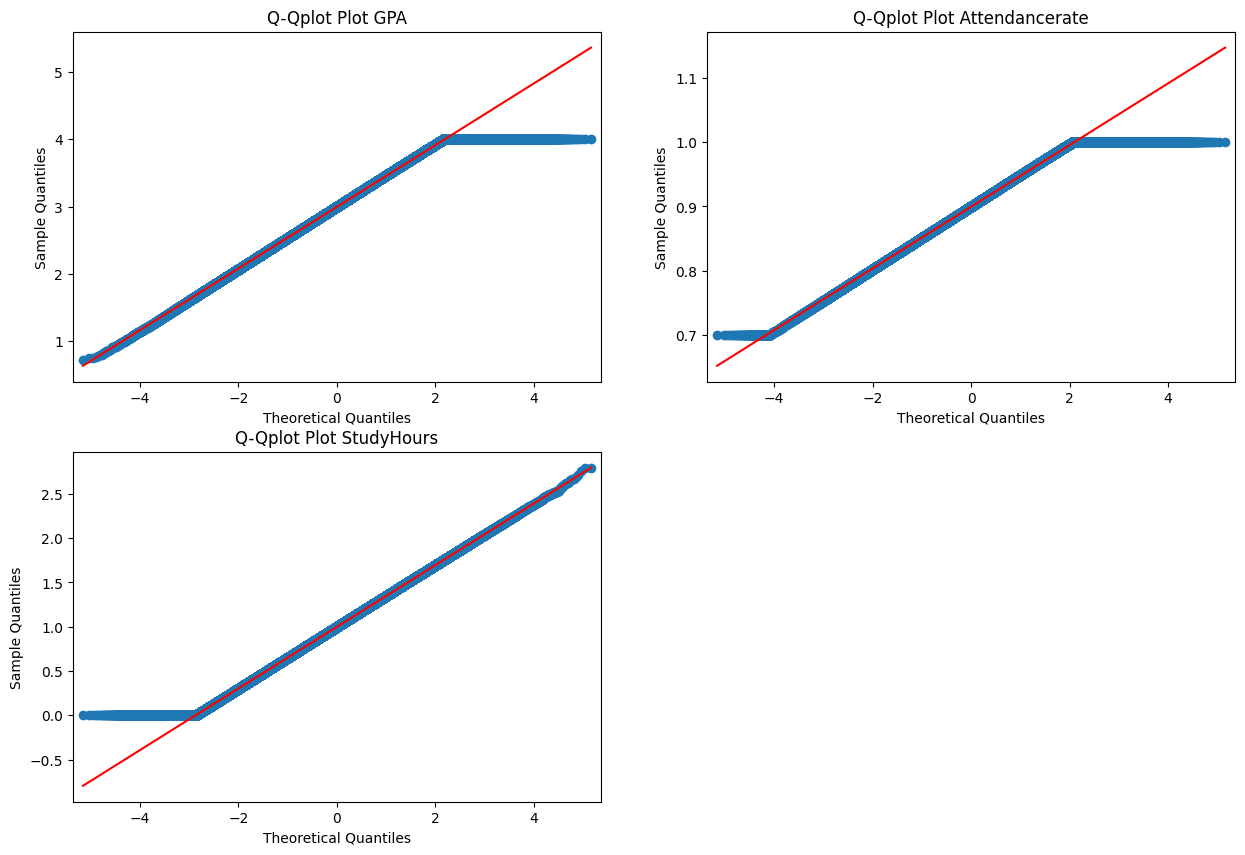

In [16]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sm.graphics.qqplot(df["GPA"].dropna(), line='s', ax=axes[0, 0])
axes[0, 0].title.set_text('Q-Qplot Plot GPA')

sm.graphics.qqplot(df["AttendanceRate"].dropna(), line='s', ax=axes[0, 1])
axes[0, 1].title.set_text('Q-Qplot Plot Attendancerate')

sm.graphics.qqplot(df["StudyHours"].dropna(), line='s', ax=axes[1, 0])
axes[1, 0].title.set_text('Q-Qplot Plot StudyHours')

fig.delaxes(axes[1,1])
plt.show()

In [17]:

column = df.columns

for i in column:
  stat, p = shapiro(df[i])
  print('Statistics=%.3f, p=%.3f' % (stat, p))
  
  alpha = 0.05
  if p > alpha:
    print('Gagal Tolak H0, {} berdistribusi normal'.format(i))
  else:
    print('Tolak H0, {} tidak berdistribusi normal'.format(i))

Statistics=0.996, p=0.000
Tolak H0, GPA tidak berdistribusi normal
Statistics=0.995, p=0.000
Tolak H0, AttendanceRate tidak berdistribusi normal
Statistics=1.000, p=0.000
Tolak H0, StudyHours tidak berdistribusi normal


<Axes: >

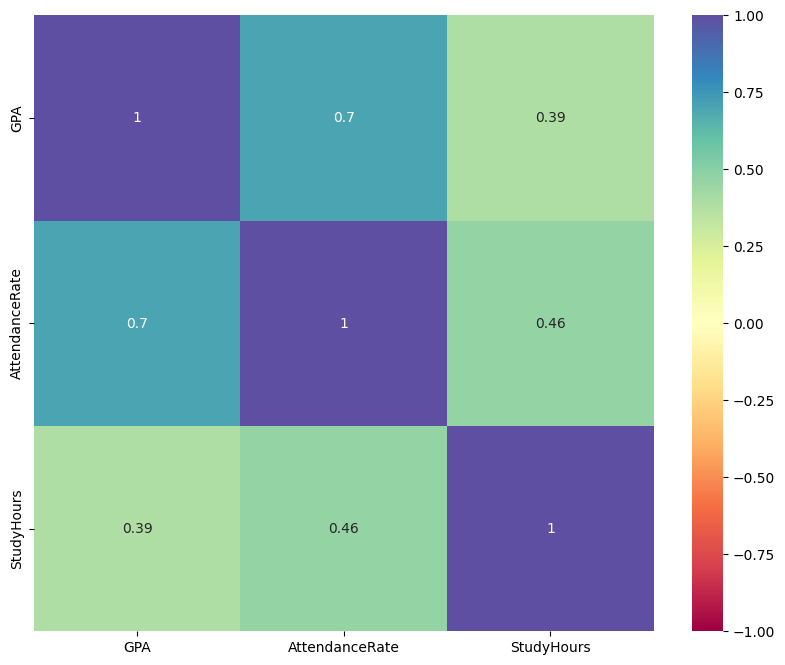

In [19]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), vmax=1, vmin=-1, center=0, cmap="Spectral", annot=True)

In [22]:
korelasi = df.corr()["GPA"].sort_values()
korelasi

StudyHours        0.389857
AttendanceRate    0.696722
GPA               1.000000
Name: GPA, dtype: float64

Diperoleh nilai korelasi :
StudyHours dengan GPA yang memiliki relasi positif rendah, ini berarti jam belajar tidak cukup mempengaruhi nilai tapi ada faktor lain yang lebih mempengaruhi;
AttendanceRate dengan GPA yang memiliki relasi postif tinggi, ini berarti kehadiran mempengaruhi nilai (semakin tinggi kehadiran maka semakin tinggi juga nilainy)

### Scalling

In [23]:
scaler = StandardScaler()
scaled_house_prices = scaler.fit_transform(df)
scaled_house_prices

array([[-0.55028741,  0.15021539,  0.25715206],
       [-0.89016751, -1.16204724, -0.34418951],
       [-1.24142256, -1.01258014,  0.01067528],
       ...,
       [-0.65879848, -2.46298291, -0.18812371],
       [ 1.04688796,  0.72186722, -0.91102813],
       [ 0.64843762,  0.58058501,  0.79470085]], shape=(8000774, 3))

In [24]:
scaled_house_prices = pd.DataFrame(scaled_house_prices, columns=df.columns)
scaled_house_prices

,GPA,AttendanceRate,StudyHours
0,-0.550287,0.150215,0.257152
1,-0.890168,-1.162047,-0.344190
2,-1.241423,-1.012580,0.010675
3,1.221940,0.982013,2.341461
4,1.958904,1.840284,0.452486
...,...,...,...
8000769,-0.736841,-1.272458,-0.409851
8000770,-0.625934,0.293943,0.289309
8000771,-0.658798,-2.462983,-0.188124
8000772,1.046888,0.721867,-0.911028


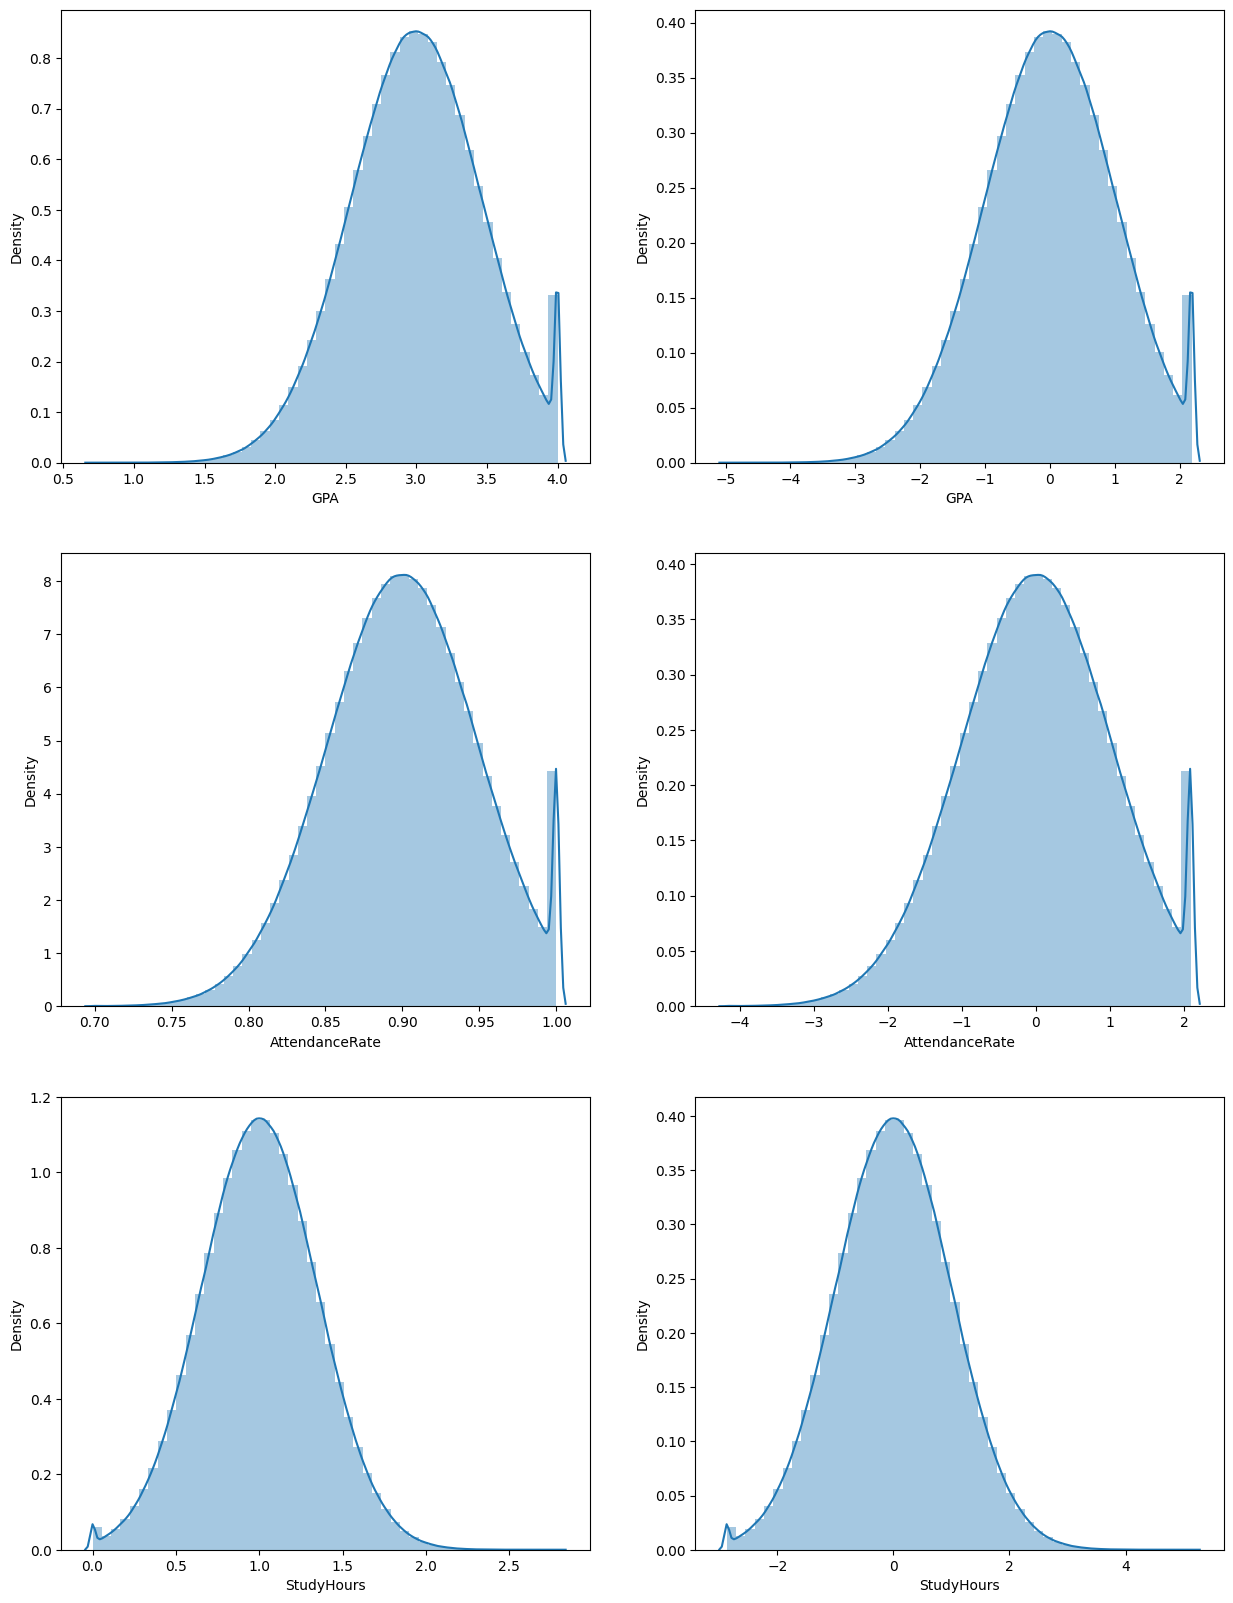

In [26]:
fig, axes = plt.subplots(3, 2, figsize=(15, 20))

sns.distplot(df["GPA"], ax=axes[0, 0])
sns.distplot(scaled_house_prices["GPA"], ax=axes[0, 1])
sns.distplot(df["AttendanceRate"], ax=axes[1, 0])
sns.distplot(scaled_house_prices["AttendanceRate"], ax=axes[1, 1])
sns.distplot(df["StudyHours"], ax=axes[2, 0])
sns.distplot(scaled_house_prices["StudyHours"], ax=axes[2, 1])

plt.show()

### Membangun Model Regresi

#### Train test spilt

In [27]:
X = scaled_house_prices.drop("GPA", axis=1).values
y = scaled_house_prices["GPA"].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

In [28]:
print("Ukuran X train ", len(X_train))
print("Ukuran X test ", len(X_test))
print("Ukuran y train ", len(y_train))
print("Ukuran y test ", len(y_test))

Ukuran X train  5600541
Ukuran X test  2400233
Ukuran y train  5600541
Ukuran y test  2400233


### Membangun model dengan Statsmodel

In [29]:
Input = sm.add_constant(X_train)

In [30]:
SimpleModel = sm.OLS(y_train, Input, missing='drop')
results = SimpleModel.fit()

In [31]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                 2.702e+06
Date:                Sat, 08 Nov 2025   Prob (F-statistic):               0.00
Time:                        20:45:44   Log-Likelihood:            -6.0554e+06
No. Observations:             5600541   AIC:                         1.211e+07
Df Residuals:                 5600538   BIC:                         1.211e+07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0001      0.000      0.359      0.7

Rincian :
No. Observation (Jumlah Data) : 5.600.541 (baris data)

1. Statistik model
- R-squared : 0.491 (49.1% variasi nilai bisa dijelaskan oleh variabel kehadiran dan jam belajar)
- Adj. R-squared : 0.491 (sama karena variabelnya cuma ada 2)
- Prob : 0.00 (karena 0.00 < 0.05 maka model signifikan, ini memiliki arti variabel independen sama sama perpengaruh ke GPA)

2. Koefiensi model
- coef : const 0.0001 (Nilai GPA ketika variabel lain 0); x1 0.6578 (Setiap kenaikan 1 unit kehadiran akan meningkatkan GPA sebesar 0.6578); x2 0.0841 (Setiap tambah jam belajar akan meningkatkan GPA sebesar 0.0841)
- p-value : const 0.720 (tidak signifikan, jadi intercept tidak penting); x1 p<0.0001 (signifikan); x2 p<0.0001 (signifikan)

3. Diagnostik Residual
- Omnibus : 4217.951 (residual tidak 100% normal)
- Prob(omni) : 0.000 < 0.05 (residual agak meyimpang dari normalitas)
- Skew : -0.056 (hampir 0, residual cukup simetris)
- Kurtosis : 2.929 (dekat dengan 3, mendekati distribusi nromal)
- Durbin-watson : 2.001 (tidak ada autokorelasi)
- Cond.no : 1.65 < 30 (aman, tidak ada multikolinearitas antar variabel)

#### Kesimpulan
- kedua variabel (AttendanceRate dan StudyHours) bepengaruh positif dan signifikan terhadap GPA
- R^2 = 0.491 (49.1%) variasi GPA bisa dijelaskan oleh kedua variabel
- Tidak ada autokorelasi atau multikolinearitas
- Residual cukup normal, karena datanya dangat besar jadi wajar jika ada sedikit penyimpangan

In [32]:
print('coefficient of determination:', results.rsquared)
print('adjusted coefficient of determination:', results.rsquared_adj)
print('regression coefficients:', results.params)

coefficient of determination: 0.4910448144565718
adjusted coefficient of determination: 0.49104463270432386
regression coefficients: [1.08245723e-04 6.57818675e-01 8.40659266e-02]


In [ ]:
list_columns = []

for i in df.columns:
  if i != "GPA":
    list_columns.append(i)

list_columns

['AttendanceRate', 'StudyHours']

In [35]:
Input_test = sm.add_constant(X_test)
prediction_1 = results.predict(Input_test)

df_statsmod = pd.DataFrame(X_test, columns=list_columns)
df_statsmod["actual_GPA"] = y_test
df_statsmod["prediction_GPA"] = prediction_1
df_statsmod.head()

,AttendanceRate,StudyHours,actual_GPA,prediction_GPA
0,-0.582032,0.181827,-1.657912,-0.367478
1,0.604143,-1.440212,0.772883,0.276452
2,-0.213542,-0.653776,0.587264,-0.195324
3,-1.329730,-0.108137,-0.442571,-0.883704
4,0.566704,1.522635,0.036346,0.500899


#### Uji distribusi residual

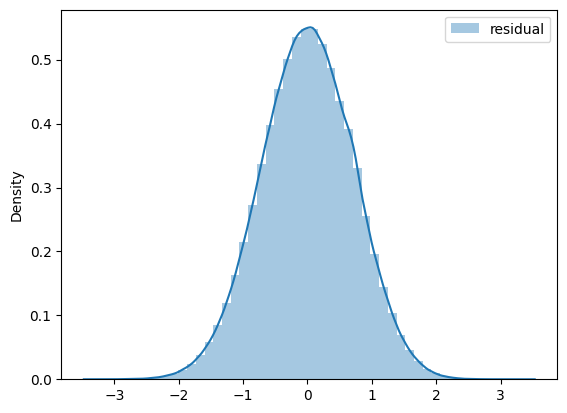

In [37]:
residual1 = df_statsmod['actual_GPA'] - df_statsmod['prediction_GPA']
sns.distplot(residual1, label="residual")
plt.legend()
plt.show()

In [38]:
stat, p = shapiro(residual1)
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
  print('Gagal Tolak H0, residual berdistribusi normal')
else:
  print('Tolak H0, residual tidak berdistribusi normal')

Statistics=1.000, p=0.000
Tolak H0, residual tidak berdistribusi normal


Walaupun plot residual membentuk lonceng, tapi pengujian normalitas menyatakan tidak berdistribusi normal

In [39]:
df_statsmod["residual"] = residual1
df_statsmod.head()

,AttendanceRate,StudyHours,actual_GPA,prediction_GPA,residual
0,-0.582032,0.181827,-1.657912,-0.367478,-1.290434
1,0.604143,-1.440212,0.772883,0.276452,0.496431
2,-0.213542,-0.653776,0.587264,-0.195324,0.782588
3,-1.329730,-0.108137,-0.442571,-0.883704,0.441132
4,0.566704,1.522635,0.036346,0.500899,-0.464552


<function matplotlib.pyplot.show(close=None, block=None)>

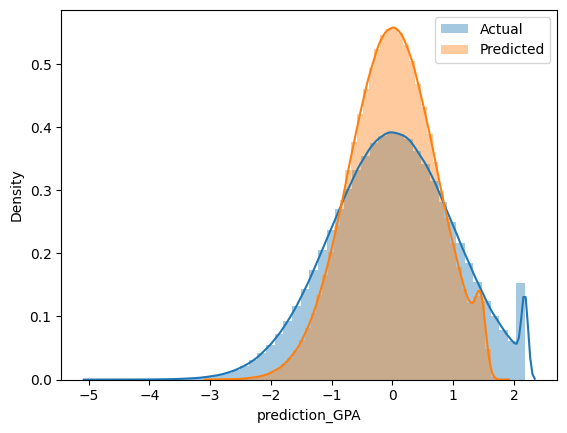

In [40]:
sns.distplot(df_statsmod['actual_GPA'], label="Actual")
sns.distplot(df_statsmod['prediction_GPA'], label="Predicted")
plt.legend()
plt.show

#### Asumsi autokorelasi

In [41]:
statsmodels.stats.stattools.durbin_watson(results.resid, axis=0)

np.float64(2.00052232478211)

karena skor diantara 1.5 - 2.5, maka tidak ada korelasi (asumsi pas)

#### Uji homoskedasitas

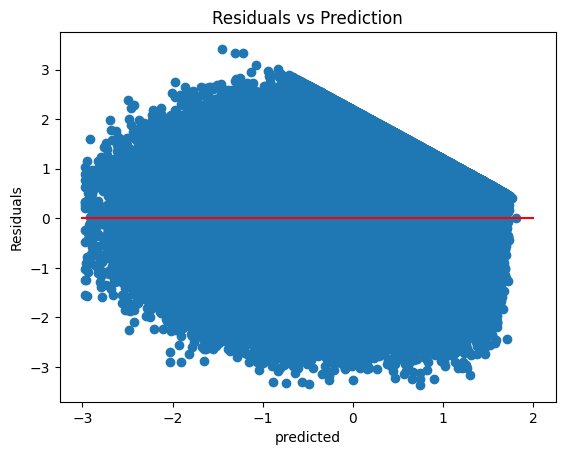

In [55]:
asm_homosk = plt.scatter(df_statsmod['prediction_GPA'], df_statsmod["residual"])
plt.xlabel('predicted')
plt.ylabel('Residuals')
plt.plot([-3, 2], [0, 0], color='red') 

asm_homosk = plt.title('Residuals vs Prediction')


Plot residual menunjukkan heteroskedastisitas, yang berarti varian error (kesalahan prediksi) model tidak konstan di seluruh rentang nilai prediksi. Ini terlihat dari pola sebaran titik yang membentuk bentuk tertentu (mirip corong atau lingkaran) dan tidak tersebar secara acak merata di sekitar garis nol.

#### Evaluasi model

In [57]:
print('R-square :', metrics.r2_score(df_statsmod['actual_GPA'], df_statsmod['prediction_GPA']))

R-square : 0.4907646597426828


In [58]:
print('MSE :', metrics.mean_squared_error(df_statsmod['actual_GPA'], df_statsmod['prediction_GPA']))

MSE : 0.5093075178670128


In [60]:
t_test_const, t_test_X1, t_test_X2 = results.tvalues
print("T-test score const: ", t_test_const)
print("T-test score X1: ", t_test_X1)
print("T-test score X2: ", t_test_X2)

T-test score const:  0.3590864819014145
T-test score X1:  1931.4694359477112
T-test score X2:  246.89302759829386


In [61]:

p_value_const, p_value_X1, p_value_X2 = results.pvalues
print("P-value const: ", p_value_const)
print("P-value X1: ", p_value_X1)
print("P-value X2: ", p_value_X2)

P-value const:  0.7195304075610818
P-value X1:  0.0
P-value X2:  0.0


Kedua variabel prediktor (X1 dan X2) sangat signifikan secara statistik karena p-value keduanya adalah 0.0 <> 0,05 (T-test scores yang sangat tinggi (1931,47 untuk X1 dan 246,89 untuk X2)) mengkonfirmasi hubungan yang kuat antara variabel-variabel ini dengan actual_GPA

In [62]:
f_value = results.fvalue
print("f-test score : ", f_value)

p_value = results.f_pvalue
print("P-value : ", p_value)

if p_value < 0.05:
  print("Tolak H0")
else:
  print("Terima H0")

f-test score :  2701726.223823214
P-value :  0.0
Tolak H0


bukti statistik yang sangat kuat menunjukan bahwa tingkat kehadiran dan jam belajar berpengaruh terhadap nilai (GPA)